In [135]:
using QuantumOptics
using CairoMakie
using Plots
using Pkg
using LaTeXStrings
using LinearAlgebra

import Plots as P
colors=P.palette(:tab10)

Consider a two-level atom with ground state |g⟩ and excited state |e⟩ driven by a coherent laser field. The Hamiltonian of the two-level atom is 
$\begin{equation}
H=-\frac{\delta}{2}\sigma_z + \frac{\Omega}{2}(\sigma_+ + \sigma_-)
\end{equation}$
where whe consider $\hbar = 1$ for computional purpose.
With Markovian dissipation accounting for spontaneous emission $\Gamma_e$, the dynamics of the system is governed by the Lindblad master equation
$\begin{equation}
\frac{d\rho_S}{dt} = -\frac{i}{\hbar}[H, \rho_S] + \Gamma_e \left( \sigma_- \rho_S \sigma_+ - \frac{1}{2} \left\{ \sigma_+ \sigma_-, \rho_S \right\} \right).
\end{equation}$

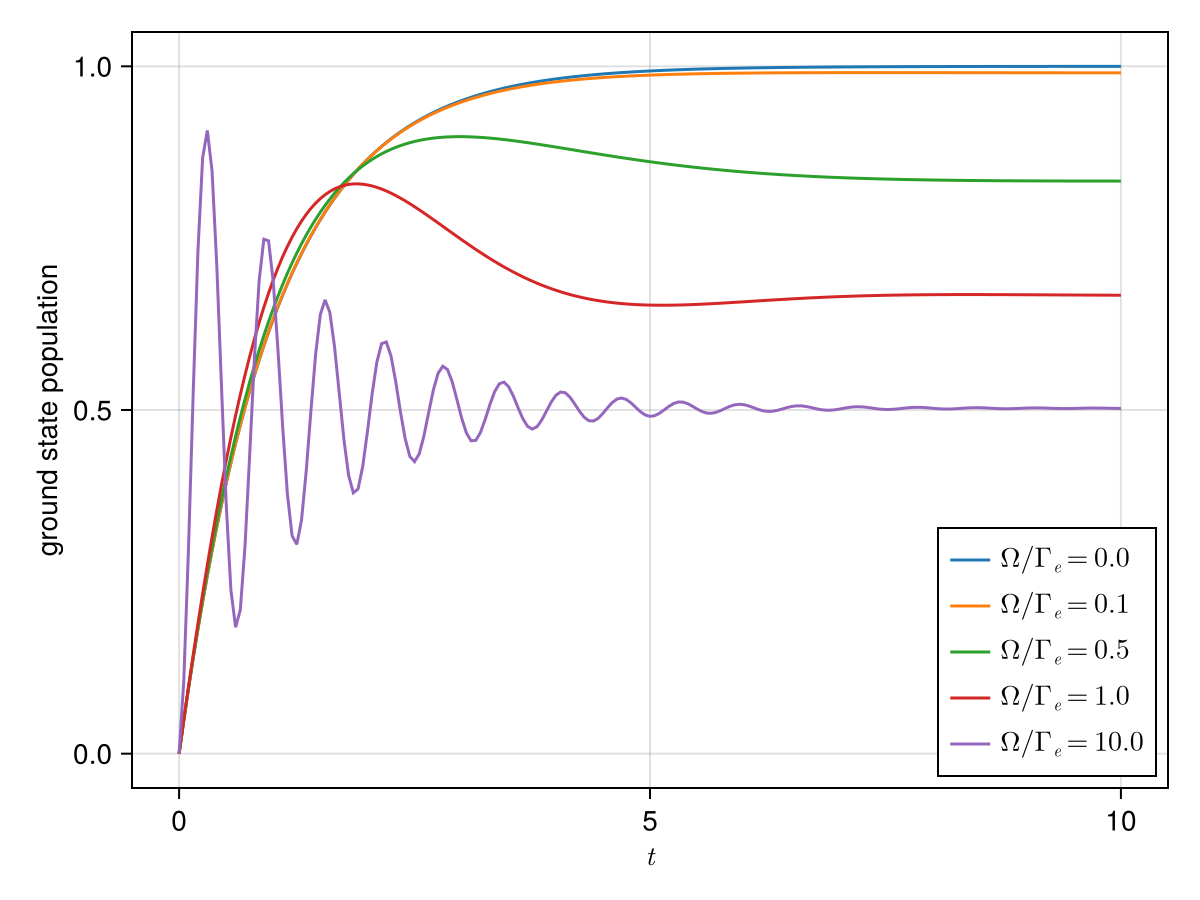

In [ ]:
δ = 0
Ωs = [0,0.1, 0.5, 1, 10]
Γe = 1

b = NLevelBasis(2)
σ_z = transition(b,2,2)-transition(b,1,1)
σ_p = transition(b,2,1)
σ_m = transition(b,1,2)

h(δ,Ω) = -δ/2*σ_z + Ω/2*(σ_p + σ_m) 

tspan = 0:0.05:10
ψ0 = nlevelstate(b, 2)
rates = [Γe]
J = [σ_m]

CairoMakie.activate!()
fig = Figure()
ax = Axis(fig[1, 1], xlabel=L"t", ylabel="ground state population")

for (i,Ω) in enumerate(Ωs)
    #time evolution
    tout, ψt=timeevolution.master(tspan,ψ0,h(δ, Ω),J; rates)
    #expectation value
    exp_pt=real(expect(transition(b,1,1),ψt))
    #plotting
    lines!(ax, tspan, exp_pt, label=L"\Omega/\Gamma_e = %$(Ω/Γe)",color=colors[i])
end

axislegend(ax,position=:rb)
fig

Let's find the steady state $\rho_{ss}$ of equation (2).

|λ| = 1.0000000000000009 for Ω = 0.0
|λ| = 0.9998077477632912 for Ω = 0.1
|λ| = 0.9428090415820635 for Ω = 0.5
|λ| = 0.7453559924999306 for Ω = 1.0
|λ| = 0.09962678803234246 for Ω = 10.0


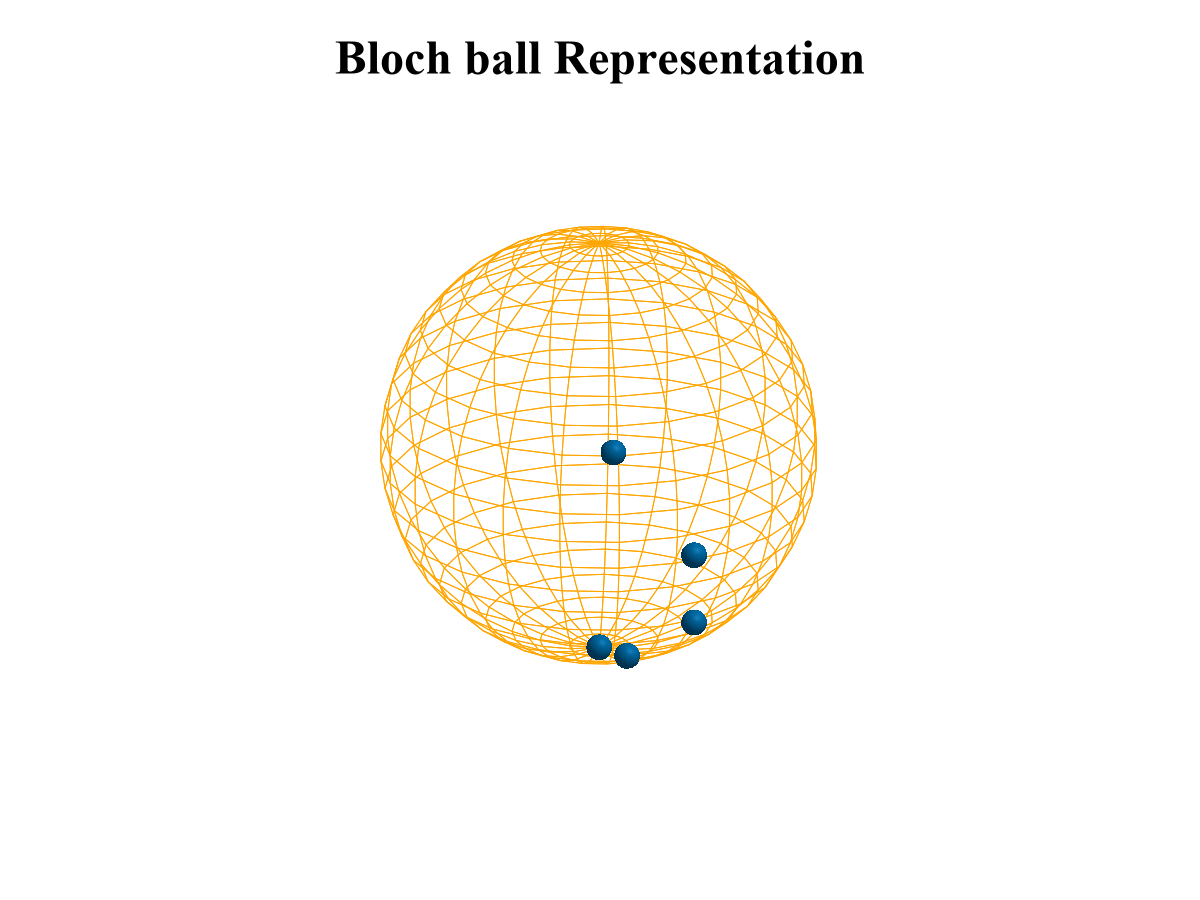

In [ ]:

σ_x = transition(b,1,2)+transition(b,2,1)
σ_y = im*(transition(b,2,1)-transition(b,1,2))
paulis = [σ_x, σ_y, σ_z]

positions = Vector{Vector{Float64}}()

for (i,Ω) in enumerate(Ωs)
ρ_ss = steadystate.eigenvector(h(δ,Ω), J);
λ = [real(tr(ρ_ss * σ)) for σ in paulis];
println("|λ| = ", norm(λ)," for Ω = ",Ω)
push!(positions,λ)
end

#use this command if you want an interactive figure
#GLMakie.activate!()

set_theme!(fonts = (; regular = "cmr10", bold = "Times New Roman Bold"))
x = [p[1] for p in positions]
y = [p[2] for p in positions]
z = [p[3] for p in positions]
f = Figure(fontsize=24)
axis = Axis3(f[1, 1], aspect = :data, title="Bloch ball Representation")
hidedecorations!(axis)
hidespines!(axis)
sphere = GLMakie.Sphere(Point3f(0), 1)
GLMakie.wireframe!(axis,sphere; linewidth=0.5, color=:orange)
meshscatter!(axis,x,y,z, markersize=0.05)

f